## <font color=darkgreen><div align="right"> <u>Python Tutorials<u></div></font>
## <div align="center"><font color = indigo>Animated Visualizations with</font> <font color = indigo>Matplotlib</font></div>
<br/>
The matplotlib.animation API provides us some helpful classes to animate functions and matrices. many web and mobile applications support animated images just like regular static images, and they don’t always allow you to upload videos. In this case, animated images can be very useful.
    
We can create an animation by using the FuncAnimation and ArtistAnimation. The class inheritance diagram is shown below:
    

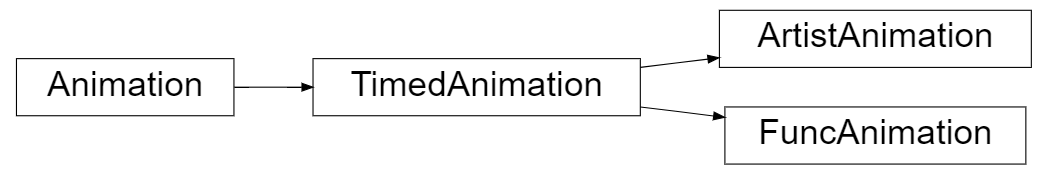

#### Existing Resources

1. [Article](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c) by Parul Pandey on Medium
<br/>

2. Matplotlib [documentation](https://matplotlib.org/3.1.1/api/animation_api.html) and [example](https://matplotlib.org/examples/animation/index.html) page
<br/>

3. Various [YouTube](https://www.youtube.com/results?search_query=Matplotlib+animation) tutorials *(mostly demonstrating the FuncAnimation class)*

#### Required modules

- Nothing outside the standard Python libraries numpy and matplotlib !!


In [6]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
style.use('ggplot')


An ArtistAnimation is made using a list of pre-computed images. The images can be created using the matplotlib imshow class. The list below shows what the other plotting methods return.

- **plt.plot ( ):** returns line2D object

- **plt.scatter ( ):** returns PathCollection object

- **plt.imshow ( ):** returns Image object (This is what we need!!) 

We will use imshow to create images of every frame and store them in a list

In [2]:
#Create matrices where each matrix represents a time step 

mat1 = np.random.rand(5,5)
mat2 = np.random.rand(5,5)
mat3 = np.random.rand(5,5)


fig = plt.figure()

#convert the matrices to an matplotlib ArtistObject
im1 = plt.imshow(mat1, animated=True, cmap = 'tab20');
im2 = plt.imshow(mat2, animated=True, cmap = 'Spectral');
im3 = plt.imshow(mat3, animated=True, cmap = 'tab10');

plt.axis('off')

allFrames = [[im1],[im2],[im3]]

animation.ArtistAnimation(fig, allFrames, interval=200, blit=True,
                                repeat_delay=10);

In [3]:
im1


### We will try to animate [De la Loubère method](https://en.wikipedia.org/wiki/Siamese_method) and track the trajectory of the algorithm using ArtistAnimation


In [4]:
def MagicSquare(sides,count):
    
    # set variables as global so they can be changed after each iteration 
    
    global row
    global column
    global master 
    
    grid = []
    
    #create empyt list of size sides x sides

    for i in range(sides):
        #Make n more lists 

        rows  = []

        for j in range(sides):
            #Fill the second set with zeros

            rows.append(0)

        #Insert the rows of zeros into the first list to make
        # a list of lists
        grid.append(rows)
        
    if count == 1:
        
        grid[row][column] = count
        master[row][column] = count
        copymaster = master
        
        
        return grid, copymaster
        
        
    
    elif (count-1)%sides == 0:

        row += 1

        if row > (sides-1):

            row = 0
            grid[row][column] = count
            master[row][column] = count
            copymaster = master
            
            return grid, copymaster

        else:
            
            grid[row][column] = count
            master[row][column] = count
            copymaster = master
            
            return grid , copymaster
    
    else:
        
        row -= 1
        column += 1

        if row < 0:

            row = sides - 1

            if column > (sides - 1):

                column = 0
                grid[row][column] = count
                master[row][column] = count
                copymaster = master
                
                return grid, copymaster
        

            else:
                
                grid[row][column] = count
                master[row][column] = count
                copymaster = master
                
                return grid, copymaster

        elif column > (sides-1):

            column = 0

            if row < 0:

                row = sides - 1
                grid[row][column] = count
                master[row][column] = count
                copymaster = master
                
                return grid, copymaster
            
            else:
                
                grid[row][column] = count
                master[row][column] = count
                copymaster = master
                
                return grid, copymaster
        else:

            grid[row][column] = count
            master[row][column] = count
            copymaster = master
            
            return grid, copymaster

def Imagify(sides,ax):
    
    global row 
    global column
    
    global master
    
    fig,ax = plt.subplots(figsize=(10,7),facecolor='pink',edgecolor = 'white');
    
    plt.title('Magic Square of size ' + str(sides),fontdict ={'fontsize': 35,'fontweight' :50,'color':'purple'} 
                , pad = 10);
    
    row = 0;
    column = sides//2;
    
    # ims is a list of lists, each row is a list of artists to draw in the
    # current frame; here we are just animating one artist, the image, in
    # each frame
    
    ims = []
    
    
    frames = [] #to hold the images
    trails = []
    
    master = []
    
    # create the first image outisde the loop, with zeros in every position.

    for i in range(sides):
        #Make n more lists 

        rows  = []

        for j in range(sides):
            #Fill the second set with zeros

            rows.append(0)

        #Insert the rows of zeros into the first list to make
        # a list of lists
        master.append(rows)
        
    for i in range(1,sides**2+1):
        
        frame, trail = MagicSquare(sides,i) #get the list of lists for this iteration/frame
        
        frames.append(frame)
        
        trails.append(trail)
        
        #Magic number
        
        magic = np.sum(trail[0])
        
        #create an image

        im = plt.imshow(trail, animated=True,cmap='Spectral',alpha = 0.5); #magma #gist_earth #Spectral #spring
        
        if sides == 1:
            
            s = 50
            
        elif sides <9:
            
            s = 25
            
        elif sides == 9:
            
            s = 22
            
        elif sides >= 15:
            
            s = 10
        
        ax.text(column, row,str(trail[row][column]),ha="center", va="center", color="r",size = s);
        
        #store the image as a frame in the total set of images
        
        ims.append([im])
        
    return ims ,frames, magic

#Call the function

def main(sides,speed):
    
    fig,ax = plt.subplots(figsize=(10,7),facecolor='white',edgecolor = 'white');
    

    plt.title('Magic Square of size ' + str(sides),
              fontdict ={'fontsize': 35,'fontweight' :50,'color':'purple'} ,pad = 10)

    
    plt.close();

    ims, fms,magic  = Imagify(sides,ax);


    ani = animation.ArtistAnimation(fig, ims, interval=speed, blit=True,
                                    repeat_delay=10);
    plt.colorbar();
    

    
    print('The magic number is',magic)
    plt.axis('off')
    
    return ani

plt.style.use('fivethirtyeight');

main(7,40)

The magic number is 175


## Make a rotating 3D plot using FuncAnimation


In [5]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,7))
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,6,7,8,9,10]
y3 = [5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(x3, y3, z3, dx, dy, dz)


ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

def rotate(angle):
    ax1.view_init(azim=angle)
    return

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=75)
